In [1]:
from statsmodels.compat import lzip
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

plt.rc("figure", figsize=(16,8))
plt.rc("font", size=14)

import lzip`: Imports the  utility function called `lzip` that takes multiple lists as arguments and returns a zipped list of tuples.
statsmodels.api as sm`: Imports the main API module from the StatsModels library, which is used for statistical modeling and analysis.
from statsmodels.formula.api import ols`: Imports the Ordinary Least Squares (OLS) function from the StatsModels formula API. OLS is a method for estimating the parameters of a linear regression model.

**Default Plot Configurations:**
   - `plt.rc("figure", figsize=(16, 8))`: Sets the default figure size for plots to 16 inches in width and 8 inches in height.
   - `plt.rc("font", size=14)`: Sets the default font size for text in plots to 14 points.


This code snippet prepares the environment for performing linear regression analysis and creating visually appealing plots using the `statsmodels` and `matplotlib` libraries. It also defines default plotting configurations to ensure consistent visuals across different plots.


In [2]:
prestige = sm.datasets.get_rdataset("Duncan", "carData", cache=True).data

The "Duncan" dataset is a dataset of intelligence scores and socioeconomic status for 20 students, collected by James A. Duncan in 1957.
Utilizes the `sm` module to load a dataset named "Duncan" from the "carData" dataset collection. I


- `prestige`: This variable will store the dataset after loading.
- `sm`:  `statsmodels` library, which is commonly used for statistical modeling and data analysis in Python.
- `.datasets`: This indicates that we are accessing the datasets module within the `statsmodels` library.
- `.get_rdataset()`: This is a function provided by `statsmodels` for loading datasets from the R datasets repository. It takes two main arguments:
  - `"Duncan"`: This is the name of the dataset we want to load. In this case, it appears to be a dataset named "Duncan."
  - `"carData"`: This is the package name or collection where the desired dataset is located. "Duncan" is part of the "carData" collection.
- `cache=True`: The dataset is cached locally after being loaded. Caching can help improve loading times for subsequent accesses to the same dataset.
- `.data`: This attribute refers to the actual data content of the loaded dataset. 



In [4]:
datasetobj=sm.datasets.get_rdataset("Duncan", "carData", cache=True)


In [4]:
print(datasetobj.__doc__)

# documentation about the object 


.. container::

   ====== ===============
   Duncan R Documentation
   ====== ===============

   .. rubric:: Duncan's Occupational Prestige Data
      :name: Duncan

   .. rubric:: Description
      :name: description

   The ``Duncan`` data frame has 45 rows and 4 columns. Data on the
   prestige and other characteristics of 45 U. S. occupations in 1950.

   .. rubric:: Usage
      :name: usage

   ::

      Duncan

   .. rubric:: Format
      :name: format

   This data frame contains the following columns:

   type
      Type of occupation. A factor with the following levels: ``prof``,
      professional and managerial; ``wc``, white-collar; ``bc``,
      blue-collar.

   income
      Percentage of occupational incumbents in the 1950 US Census who
      earned $3,500 or more per year (about $36,000 in 2017 US dollars).

   education
      Percentage of occupational incumbents in 1950 who were high school
      graduates (which, were we cynical, we would say is roughly
      equival

In [5]:
#Let's work just with the data part of the object
prestige = datasetobj.data

prestige: This is the variable being assigned a value. It's intended to hold the data from the data property of datasetobj.

datasetobj: Represents a dataset or some kind of data structure. 

.data: This is a property or attribute of the datasetobj from which data is being extracted. This attribute holds the main data content of the dataset.

In [6]:
prestige.head()

,type,income,education,prestige
rownames,,,,
accountant,prof,62,86,82
pilot,prof,72,76,83
architect,prof,75,92,90
author,prof,55,90,76
chemist,prof,64,86,90


In [7]:
prestige.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45 entries, accountant to waiter
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   type       45 non-null     object
 1   income     45 non-null     int64 
 2   education  45 non-null     int64 
 3   prestige   45 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 1.8+ KB


To learn about OLS check out: https://setosa.io/ev/ordinary-least-squares-regression/

In [9]:
prestige_model = ols("prestige ~ income + education", data=prestige).fit()

The purpose of this code is to create and fit a linear regression model that predicts the 'prestige' of individuals based on their 'income' and 'education' levels.

Let's break down the code step by step:

2. `ols("prestige ~ income + education", data=prestige)`: This part defines the linear regression model formula. In this case, it's specified that the 'prestige' variable is being regressed against the 'income' and 'education' variables. The formula `"prestige ~ income + education"` indicates that we're trying to predict 'prestige' based on 'income' and 'education'. The `ols` function creates a model object with this formula.

3. `data=prestige`: This part specifies the dataset used for the regression. It's assumed that there's a dataset named 'prestige' containing columns for 'prestige', 'income', and 'education'. The dataset is provided as an argument to the `data` parameter of the `ols` function.

4. `.fit()`: This method fits the linear regression model to the provided data. It calculates the coefficients that best fit the model to the data, based on the ordinary least squares method. The result of this fitting process is stored in the `prestige_model` variable.

The resulting `prestige_model` object contains information about the fitted linear regression model, including coefficients, statistical information, and other model-related details.

Remember, the accuracy and reliability of the regression analysis depend on the quality of the data, the assumptions of the linear regression model, and potential confounding variables that might not be accounted for in the model.

In [10]:
print(prestige_model.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           8.65e-17
Time:                        08:53:46   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.0647      4.272     -1.420      0.1

 `print()` function to display a summary of a machine learning model referred to as `prestige_model`. The purpose of this code is to provide a concise overview of the architecture and structure of the machine learning model, which is helpful for understanding its components and configuration.

Here's a breakdown of the code and its functionality:


The `summary()` method is a common function provided by many machine learning frameworks, such as TensorFlow and Keras, to display a high-level summary of the model's architecture.



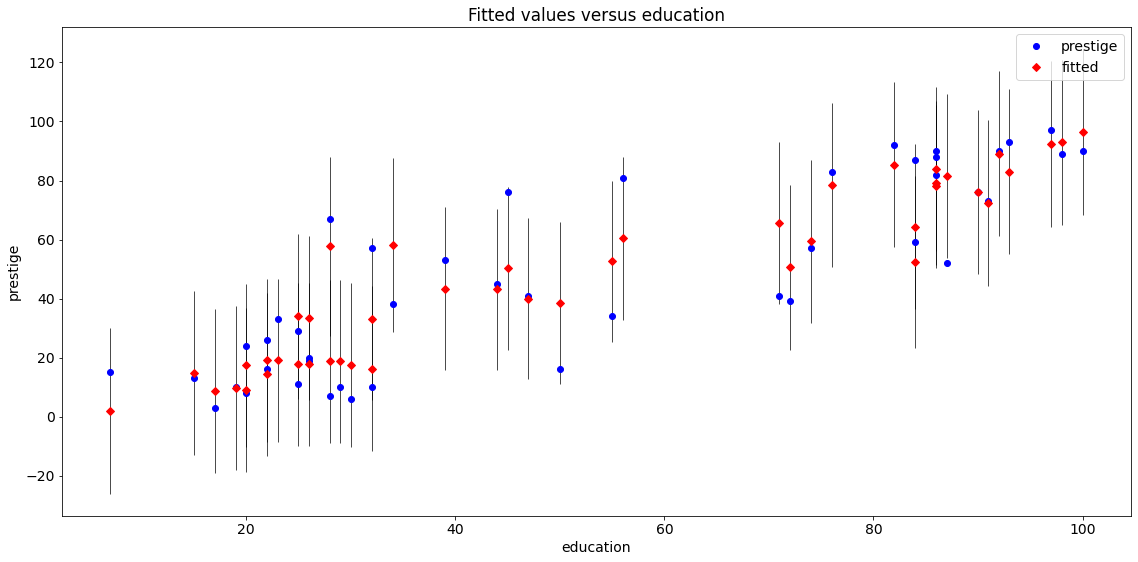

In [11]:
fig = sm.graphics.plot_fit(prestige_model, "education")
fig.tight_layout(pad=1.0)

   - `sm.graphics.plot_fit` is a function provided by `statsmodels` for visualizing the fit of the model to the data. It creates a graphical representation of how well the model fits the observed data.
   - `"education"` is the variable (or predictor) for which the fit is being visualized. 
   - The result of this function call is stored in the variable `fig`.

2. `fig.tight_layout(pad=1.0)`:
   - This line of code adjusts the layout of the figure to ensure that all elements within the figure (e.g., axes labels, titles, etc.) are properly positioned and do not overlap.
   - The `tight_layout` function is used to achieve this adjustment.
   - The `pad=1.0` parameter specifies the padding between the figure's content and the edges of the figure. A value of `1.0` here means that there will be a padding of one inch (or unit) between the content and the edges.



To explore further see: https://www.statsmodels.org/stable/examples/notebooks/generated/regression_plots.html

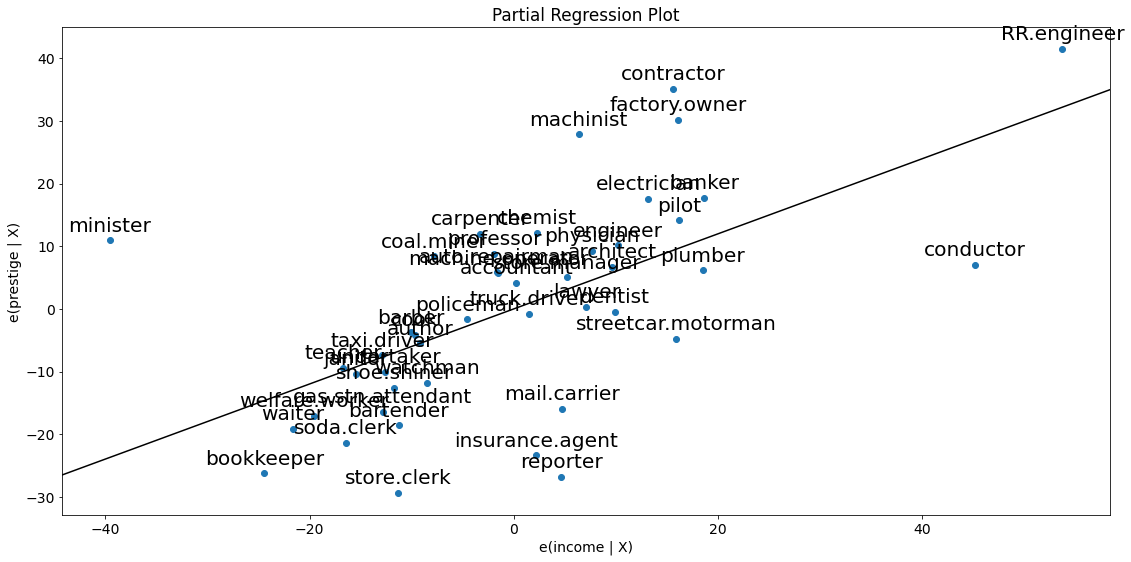

In [12]:
fig = sm.graphics.plot_partregress("prestige", "income", ["education"], data=prestige)
fig.tight_layout(pad=1.0)

```

1. `fig = sm.graphics.plot_partregress("prestige", "income", ["education"], data=prestige)`: This line of code is creating a partial regression plot using the `plot_partregress` function from the `statsmodels` library. 

   - `"prestige"`: This is the dependent variable that you're trying to predict or explain using the other variables.
   - `"income"`: This is the independent variable you're interested in analyzing in relation to the dependent variable.
   - `["education"]`: This is a list of control variables that you want to include in the partial regression analysis to account for their effects on the relationship between "prestige" and "income".
   - `data=prestige`: This parameter specifies the dataset (`prestige`) from which the variables are taken. 

2. `fig.tight_layout(pad=1.0)`: This line is used to adjust the layout of the plot to ensure that all elements are properly arranged. The `pad` parameter defines the padding between the plot elements.

**How it works:**

Partial regression plots are used to visualize the relationship between two variables while accounting for the effects of one or more control variables. In this case, the code is creating a partial regression plot between the variables "prestige" and "income" while controlling for the variable "education."

The partial regression plot will show the relationship between "prestige" and "income" after accounting for the influence of "education." This helps in understanding the direct association between "prestige" and "income" by removing the effect of "education."



In [13]:
#The partial regression plot confirms the influence of conductor, minister, and RR.engineer on the partial
#relationship between income and prestige. The cases greatly decrease the effect of income on prestige
#Let's take those professions out of our next analysis
subset = ~prestige.index.isin(["conductor", "RR.engineer", "minister"])
prestige_model2 = ols(
    "prestige ~ income + education", data=prestige, subset=subset
).fit()
print(prestige_model2.summary())

                            OLS Regression Results                            
Dep. Variable:               prestige   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     138.1
Date:                Wed, 15 Nov 2023   Prob (F-statistic):           2.02e-18
Time:                        09:01:12   Log-Likelihood:                -160.59
No. Observations:                  42   AIC:                             327.2
Df Residuals:                      39   BIC:                             332.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.3174      3.680     -1.717      0.0

In [19]:
from statsmodels.formula.api import ols

#Create a boolean mask to exclude specific professions from the analysis
subset = ~prestige.index.isin(["conductor", "RR.engineer", "minister"])

#Create a linear regression model (OLS) for prestige based on income and education
prestige_model2 = ols("prestige ~ income + education", data=prestige, subset=subset).fit()



